# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib.

First thing, Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# next load the data
df = pd.read_csv('final.csv')
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,0,1
1,216500,2006,169,51,1,1,612,1965,0,0,0,0,41,0,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,0,1
3,379900,2005,265,92,1,1,618,2000,33541,1,0,0,5,1,0
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,0,1


In [5]:
df.tail()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
1855,760000,2008,881,249,5,5,7842,2003,436035,1,0,0,5,1,0
1856,690000,2015,1553,473,5,6,6501,1956,23086,1,0,0,59,1,0
1857,600000,1999,942,287,5,6,7064,1995,217800,1,0,0,4,1,0
1858,759900,2009,803,245,5,6,7500,2006,8886,1,0,0,3,1,0
1859,735000,2015,1459,444,5,6,7515,1958,10497,1,0,0,57,1,0


In [7]:
df.shape

(1860, 15)

## Linear Regression Model

In [9]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [25]:
# step 1
# seperate input features in x
x = df.drop('price', axis=1)

# store the target variable in y
y = df['price']

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [13]:
# import module
from sklearn.model_selection import train_test_split

In [27]:
x.property_type_Bunglow.value_counts()

property_type_Bunglow
1    1510
0     350
Name: count, dtype: int64

In [29]:
#step 2
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=x.property_type_Bunglow)

In [31]:
x_train.head()

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
314,2012,245,75,2,2,1470,1986,0,0,1,1,26,0,1
1167,2005,458,152,4,3,1374,1959,8093,1,0,0,46,1,0
817,2003,418,127,3,3,1885,1990,2718,1,0,0,13,1,0
1761,2011,409,116,5,4,3992,2005,10454,1,0,1,6,1,0
1270,2009,532,162,4,3,2400,1970,11325,1,0,0,39,1,0


In [33]:
x_train.property_type_Bunglow.value_counts()

property_type_Bunglow
1    1208
0     280
Name: count, dtype: int64

In [35]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1488, 14), (1488,), (372, 14), (372,))

In [37]:
#step 3
# train your model
model = LinearRegression()
lrmodel = model.fit(x_train, y_train)

In [39]:
lrmodel.coef_

array([ 7.75571814e+03, -5.40103383e+02,  2.63971921e+03,  5.24389857e+03,
        5.07523791e+03,  3.13589668e+01,  4.23667516e+03,  1.46538177e-01,
        1.07631980e+04,  7.40599835e+03, -5.01861844e+04,  3.51904298e+03,
        1.07631980e+04, -1.07631980e+04])

In [41]:
lrmodel.intercept_

-23853327.390769698

In [43]:
x_train.head(1)

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
314,2012,245,75,2,2,1470,1986,0,0,1,1,26,0,1


In [51]:
#step 4
# make preditions on train set
train_pred = lrmodel.predict(x_train)

In [55]:
train_pred

(1488,)

In [49]:
#step 5
# evaluate your model
# we need mean absolute error
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train_pred, y_train)
print('Train error is', train_mae)

Train error is 86634.69445438856


In [ ]:
lrmodel.coef_

array([ 7.92898177e+03, -4.22689266e+02,  2.24606761e+03,  3.64530650e+03,
        7.46225466e+03,  2.81854446e+01,  4.39746517e+03,  1.69254225e-01,
       -1.00734187e+04, -7.90752462e+03, -4.98164171e+04,  3.53151659e+03,
       -2.85853946e+04])

In [57]:
lrmodel.intercept_

-23853327.390769698

In [59]:
# make predictions om test set
ypred = lrmodel.predict(x_test)

#evaluate the model
test_mae = mean_absolute_error(ypred, y_test)
print('Test error is', test_mae)

Test error is 83550.9715285614


### Our model is still not good beacuse we need a model with Mean Absolute Error < $70,000

Note - We have not scaled the features and not tuned the model.

## Decision Tree Model

In [31]:
# import decision tree model
from sklearn.tree import DecisionTreeRegressor

In [32]:
# create an instance of the class
dt = DecisionTreeRegressor(max_depth=3, max_features=10, random_state=567)

In [33]:
# train the model
dtmodel = dt.fit(x_train,y_train)

In [39]:
# make predictions using the test set
ytrain_pred = dtmodel.predict(x_train)

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

61653.68949055864

In [35]:
# make predictions using the test set
ytest_pred = dtmodel.predict(x_test)

In [36]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

58591.69255181888

## How do I know if my model is Overfitting or Generalised?

In [ ]:
# make predictions on train set
ytrain_pred = dtmodel.predict(x_train)

In [ ]:
# import mean absolute error metric
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

65141.146705895575

## Plot the tree

In [ ]:
# get the features
dtmodel.feature_names_in_

array(['year_sold', 'property_tax', 'insurance', 'beds', 'baths', 'sqft',
       'year_built', 'lot_size', 'basement', 'popular', 'recession',
       'property_age', 'property_type_Condo'], dtype=object)

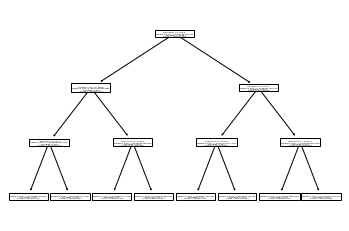

In [ ]:
# plot the tree
from sklearn import tree

# Plot the tree with feature names
tree.plot_tree(dtmodel, feature_names=dtmodel.feature_names_in_)

#tree.plot_tree(dtmodel)
#plt.show(dpi=300)

# Save the plot to a file
plt.savefig('tree.png', dpi=300)

## Random Forest Model

In [ ]:
# import decision tree model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# create an instance of the model
rf = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

In [ ]:
# train the model
rfmodel = rf.fit(x_train,y_train)

In [ ]:
# make prediction on train set
ytrain_pred = rfmodel.predict(x_train)

In [ ]:
# make predictions on the x_test values
ytest_pred = rfmodel.predict(x_test)

In [ ]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

42766.2177613941

In [ ]:
# Individual Decision Trees
# tree.plot_tree(rfmodel.estimators_[2], feature_names=dtmodel.feature_names_in_)

## Pickle:

* The pickle module implements a powerful algorithm for serializing and de-serializing a Python object structure.

* The saving of data is called Serialization, and loading the data is called De-serialization.

**Pickle** model provides the following functions:
* **`pickle.dump`** to serialize an object hierarchy, you simply use `dump()`.
* **`pickle.load`** to deserialize a data stream, you call the `loads()` function.

In [40]:
# import pickle to save model
import pickle

# Save the trained model on the drive
pickle.dump(dtmodel, open('RE_Model','wb'))

In [ ]:
# Load the pickled model
RE_Model = pickle.load(open('RE_Model','rb'))

In [ ]:
# Use the loaded pickled model to make predictions
RE_Model.predict([[2012, 216, 74, 1 , 1, 618, 2000, 600, 1, 0, 0, 6, 0]])

C:\Users\KANGRSW\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


array([258697.91])

In [41]:
x_test.head(1)

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
266,2013,503,167,2,2,1200,1940,2744,1,1,1,73,1,0
